In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 8)
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as T


### 1. Реализовать весь процесс создания и обучения сверточной нейронной сети на датасете `MNIST`

* Соблюдайте единый стиль в оформлении (отступах, пробелах, именах методов и функций, названиях переменных). Ваш код должен быть легко читаемым и понятным
* Разбейте код на отдельные осмысленные блоки, каждый блок в своей ячейке, например одна ячейка для загрузки данных, другая для определения модели, третья для тренировки и т.д.
* Можете основывать свое решение на коде лекции

### Ваш код должен содержать:

* Загрузку и подготовку данных (используйте `torch.utils.data.DataLoader` и `MNIST` доступный в `torchvision`)
* Обьявление и тренировку модели с использованием `PyTorch`
* Выводить графики показывающие точность и лосс на каждой эпохе на трейн и тест сете и в целом выводить полезные визуализации и информацию позволяющую отслеживать и оценивать процесс тренировки (можете использовать класс `Mean` который был в одной из первых ДЗ для сбора статистики по батчам)
* Используйте сверточную нейронную сеть и стохастический градиентный спуск
* Любые необходимые библиотеки можете импортировать в первой ячейке

In [2]:
# your code here
transform=T.ToTensor()
train_ds=torchvision.datasets.MNIST('./mnist',train=True,download=True,transform=transform)
test_ds=torchvision.datasets.MNIST('./mnist',train=False,download=True,transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

9920512it [00:00, 20797261.78it/s]                            


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 329167.50it/s]
0it [00:00, ?it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz


1654784it [00:00, 4567216.95it/s]                             
8192it [00:00, 70322.41it/s]            


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz
Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


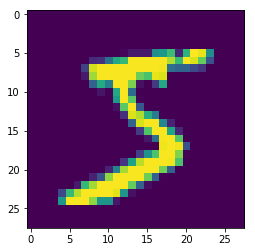

In [3]:
x, y = train_ds[0]
x=T.ToPILImage()(x)
plt.imshow(x)


In [4]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1=nn.Conv2d(1,8,3,padding=1)
        self.l2=nn.Conv2d(8,16,3,padding=1)
        self.l3=nn.Conv2d(16,32,3,padding=1)
        self.pool=nn.MaxPool2d(2,2)
        self.global_pool=nn.MaxPool2d(4,4)
        self.output=nn.Linear(32,10)
    def forward(self,x):
        for l in [self.l1,self.l2,self.l3]:
            x=l(x)
            x=torch.relu(x)
            x=self.pool(x)
        x=self.global_pool(x)
        x=x.view(x.shape[0],x.shape[1])
        x=self.output(x)
        return x
    

In [5]:
class Mean():
    def __init__(self):
        self.reset()
        
    def update(self, values):
        if values.shape!=():
            self.sum += sum(values)
            self.n += len(values)
        else:
            self.sum+=values
            self.n+=1
    def compute_and_reset(self):
        value = self.sum / self.n
        self.reset()
        return value
        
    def reset(self):
        self.sum = 0
        self.n = 0

In [6]:
def accuracy(a, b):
    return (a == b).float().mean()





  0%|          | 0/20 [00:00<?, ?it/s]

Train loss= 2.012
Train acc= 0.3058 







  5%|▌         | 1/20 [00:08<02:50,  8.97s/it]

Test loss= 1.13
Test acc= 0.5553 

Train loss= 0.4759
Train acc= 0.851 







 10%|█         | 2/20 [00:17<02:41,  8.98s/it]

Test loss= 0.439
Test acc= 0.8565 

Train loss= 0.2061
Train acc= 0.9371 







 15%|█▌        | 3/20 [00:26<02:32,  8.98s/it]

Test loss= 0.157
Test acc= 0.9497 

Train loss= 0.1413
Train acc= 0.9564 







 20%|██        | 4/20 [00:35<02:23,  8.99s/it]

Test loss= 0.1818
Test acc= 0.9362 

Train loss= 0.2002
Train acc= 0.9449 







 25%|██▌       | 5/20 [00:44<02:14,  8.99s/it]

Test loss= 0.1735
Test acc= 0.9429 

Train loss= 0.1184
Train acc= 0.963 







 30%|███       | 6/20 [00:53<02:05,  8.99s/it]

Test loss= 0.1054
Test acc= 0.9636 

Train loss= 0.09689
Train acc= 0.9702 







 35%|███▌      | 7/20 [01:02<01:56,  8.98s/it]

Test loss= 0.1084
Test acc= 0.9643 

Train loss= 0.08851
Train acc= 0.9726 







 40%|████      | 8/20 [01:11<01:47,  8.98s/it]

Test loss= 0.08005
Test acc= 0.9751 

Train loss= 0.08115
Train acc= 0.9749 







 45%|████▌     | 9/20 [01:20<01:38,  8.97s/it]

Test loss= 0.08592
Test acc= 0.9729 

Train loss= 0.07455
Train acc= 0.9765 







 50%|█████     | 10/20 [01:29<01:29,  8.96s/it]

Test loss= 0.09759
Test acc= 0.9677 

Train loss= 0.06361
Train acc= 0.9802 







 55%|█████▌    | 11/20 [01:38<01:20,  9.00s/it]

Test loss= 0.06434
Test acc= 0.9791 

Train loss= 0.06114
Train acc= 0.981 







 60%|██████    | 12/20 [01:47<01:11,  8.98s/it]

Test loss= 0.06191
Test acc= 0.9798 

Train loss= 0.05946
Train acc= 0.9812 







 65%|██████▌   | 13/20 [01:56<01:02,  8.98s/it]

Test loss= 0.06368
Test acc= 0.9789 

Train loss= 0.05764
Train acc= 0.9819 







 70%|███████   | 14/20 [02:05<00:54,  9.00s/it]

Test loss= 0.06163
Test acc= 0.9798 

Train loss= 0.05609
Train acc= 0.9823 







 75%|███████▌  | 15/20 [02:14<00:44,  8.98s/it]

Test loss= 0.06156
Test acc= 0.9812 

Train loss= 0.0549
Train acc= 0.9826 







 80%|████████  | 16/20 [02:23<00:35,  8.96s/it]

Test loss= 0.06318
Test acc= 0.9787 

Train loss= 0.05402
Train acc= 0.9836 







 85%|████████▌ | 17/20 [02:32<00:26,  8.97s/it]

Test loss= 0.0684
Test acc= 0.9773 

Train loss= 0.05227
Train acc= 0.9839 







 90%|█████████ | 18/20 [02:41<00:17,  8.96s/it]

Test loss= 0.05908
Test acc= 0.9804 

Train loss= 0.0518
Train acc= 0.9838 







 95%|█████████▌| 19/20 [02:50<00:08,  8.98s/it]

Test loss= 0.0566
Test acc= 0.9819 

Train loss= 0.04982
Train acc= 0.9848 







100%|██████████| 20/20 [02:59<00:00,  8.99s/it]

Test loss= 0.05558
Test acc= 0.9823 



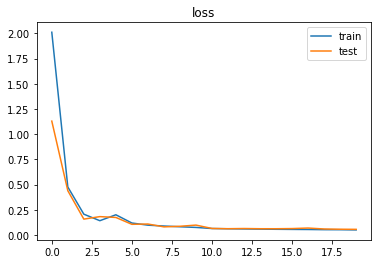

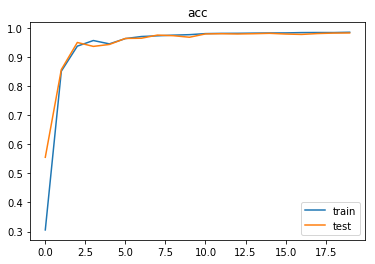

In [16]:
from tqdm import tqdm
model=Model()
model=model.cuda()
opt=torch.optim.SGD(model.parameters(),0.1)
scheduler=True
scheduler = torch.optim.lr_scheduler.StepLR(opt, 10, 0.5)
train_dl=torch.utils.data.DataLoader(train_ds,batch_size=256,shuffle=True)
test_dl=torch.utils.data.DataLoader(test_ds,batch_size=256,shuffle=True)
stats = {
    'train_loss': [],
    'test_loss': [],
    'train_acc': [],
    'test_acc': []
}
mean_loss_train = Mean()
mean_acc_train = Mean()
mean_loss_test = Mean()
mean_acc_test = Mean()
for epoch in tqdm(range(20)):
    model.train()
    if (scheduler):
        scheduler.step()
    with torch.set_grad_enabled(True):
        for images, targets in train_dl:
            images=images.cuda()
            targets=targets.cuda()
            logits=model(images)
            train_loss=F.cross_entropy(input=logits,target=targets)
            train_acc=accuracy(targets,logits.argmax(1))
            mean_loss_train.update(train_loss.data.cpu().numpy())
            mean_acc_train.update(train_acc.data.cpu().numpy())
            opt.zero_grad()
            train_loss.backward()
            opt.step()
    train_loss = mean_loss_train.compute_and_reset()
    train_acc = mean_acc_train.compute_and_reset()

    print('Train loss= {:.4}\nTrain acc= {:.4} \n'.format(train_loss,train_acc))
    stats['train_loss'].append(train_loss)
    stats['train_acc'].append(train_acc)
    
    with torch.no_grad():    
        model.eval()
        for images, targets in test_dl:
            images=images.cuda()
            targets=targets.cuda()
            logits=model(images)
            test_loss=F.cross_entropy(input=logits,target=targets)
            test_acc=accuracy(targets,logits.argmax(1))
            mean_loss_test.update(test_loss.data.cpu().numpy())
            mean_acc_test.update(test_acc.data.cpu().numpy())

    test_loss = mean_loss_test.compute_and_reset()#np.mean(train_losses)
    test_acc = mean_acc_test.compute_and_reset()#np.mean(train_accs)
    print('Test loss= {:.4}\nTest acc= {:.4} \n'.format(test_loss,test_acc))
    stats['test_loss'].append(test_loss)
    stats['test_acc'].append(test_acc)

plt.plot(stats['train_loss'], label='train')
plt.plot(stats['test_loss'], label='test')
plt.title('loss')
plt.legend()
plt.show()

plt.plot(stats['train_acc'], label='train')
plt.plot(stats['test_acc'], label='test')
plt.title('acc')
plt.legend()
plt.show()